In [118]:
%%time

import pandas as pd
import numpy as np

# Random seed for reproducibility
SEED = 123
# A file to save global variables
global_variables = pd.DataFrame({'SEED': [SEED]})
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

train_unprocessed = pd.read_csv('datasets/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test_unprocessed = pd.read_csv('datasets/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')

train_unprocessed.head()

CPU times: total: 812 ms
Wall time: 955 ms


,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [119]:
train_unprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Data columns (total 75 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   latitude                                                  79023 non-null  float64
 1   longitude                                                 79023 non-null  float64
 2   year                                                      79023 non-null  int64  
 3   week_no                                                   79023 non-null  int64  
 4   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 5   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 6   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 7   SulphurDioxide_cloud_fraction                             64414 no

## 00. Baseline

First, we'll make a baseline prediction, that all emissions are equal to the median emission of the training set. We'll calculate the Score of this prediction on the training set (for future cases, we'll calculate separately Train Score and Cross-validation Score).

Here is what we'll use to compare performances of our models:

Cross-val Score = (Average Cross-validation RMSE) + (1 Standard deviation of Cross-validation RMSE).

(we want to minimize this Score).

Score for this case will be just Train RMSE.

We'll save our intermediate results in DataFrame scores_df:

In [120]:
from sklearn.metrics import mean_squared_error

train_predictions_00 = pd.DataFrame([train_unprocessed['emission'].median()] * len(train_unprocessed), columns=['emission'])

scores_df = pd.DataFrame({'Comment': [], 'Train Score': [], 'Cross-val Score': [], 'Test RMSE': []})

score_00 = mean_squared_error(train_unprocessed['emission'], train_predictions_00['emission'], squared=False) - 0

scores_df.loc[0, 'Comment'] = 'Just median'
scores_df.loc[0, 'Train Score'] = score_00
scores_df.loc[0, 'Cross-val Score'] = np.nan
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,NaN


Now, we'll make a submission to Kaggle to see our Test RMSE. We won't use Test RMSE in making decisions, since we don't want to overfit to the visible testing data (unvisible part of the testing data will be used in calculating the final competition score) but we'll use Test RMSE to catch bugs in our Score calculations:

In [121]:
test_predictions_00 = pd.DataFrame([train_predictions_00['emission'].median()] * len(test_unprocessed), columns=['emission'])
submission_00 = pd.concat([pd.DataFrame(test_unprocessed.index, columns=['ID_LAT_LON_YEAR_WEEK']), test_predictions_00], axis=1)

submission_00.to_csv('submissions/submission_00.csv', index=False)

scores_df.loc[0, 'Test RMSE'] = 169.19374
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374


## Choosing number of cross-validation splits

We'll use LightGBM with n_estimators=10 as our first estimator. It is fast, efficient, doesn't require normalization and can handle missing values. Increasing n_estimators will improve performance, 

For calculating Score, I wrote get_score function, that is located in ['functions/get_score.py'](functions/get_score.py). This function takes a number of TimeSeriesSplit slits as one of its arguments. 

We want such number of splits that give us the best balance between bias and variance. For the sake of run time, the optimal number of splits calculation is done in a separate file: ['functions/n_splits.py'](functions/n_splits.py). We'll calculate scores among several different random states (all depend on the SEED, chosen at the beginning of this file).

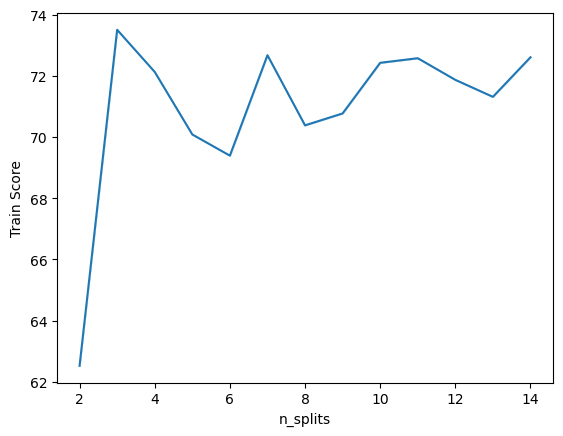

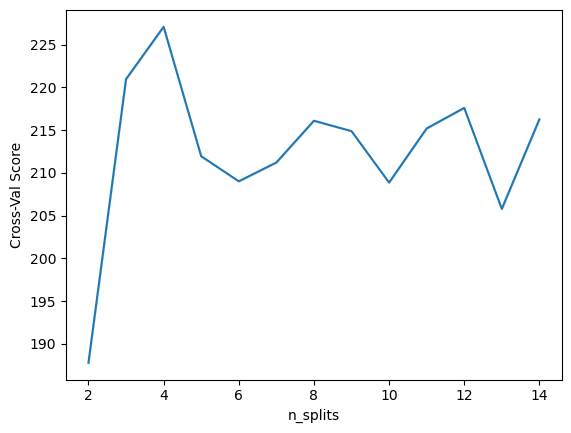

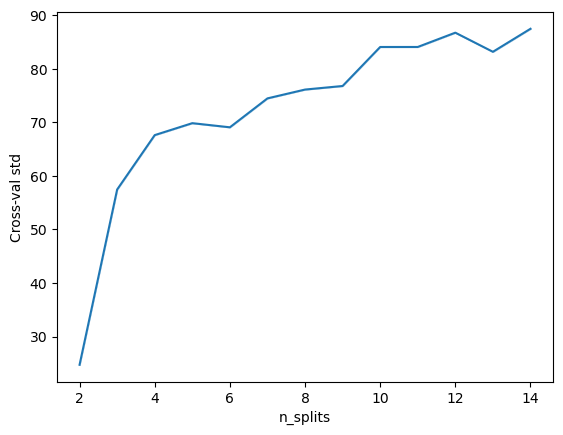

In [122]:
tradeoff = pd.read_csv('functions/tradeoff.csv', index_col=0)

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=tradeoff, x='n_splits', y='Train Score')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-Val Score')
plt.show()
sns.lineplot(data=tradeoff, x='n_splits', y='Cross-val std')
plt.show()


We'll use 4 splits, for a good balance between bias, variance and execution time:

In [123]:
N_SPLITS = 4
global_variables['N_SPLITS'] = N_SPLITS
global_variables.to_csv('global_variables.csv')
global_variables.to_csv('functions/global_variables.csv')

## 01. LightGBM on unprocessed data

Let's find Scores and Test RMSE for this number of splits:

In [124]:
%%time

# UNCOMMENT TO INSTALL LightGBM
#!pip install lightgbm
import lightgbm as lgb

study_number = '01'

# Instantiate the estimator
model = lgb.LGBMRegressor(random_state=SEED, n_jobs=-1, n_estimators=10)

# Calculate scores
from functions.get_score import get_score

train_score, cross_score, cross_scores_std, submission = get_score(global_variables, train_unprocessed, test_unprocessed, model, scores_df,
                                                                  comment="LightGBM on unprocessed data")

submission.to_csv('submissions/submission_' + study_number + '.csv', index=False)

CPU times: total: 14.8 s
Wall time: 1.64 s


In [125]:
scores_df.loc[int(study_number), 'Test RMSE'] = 92.71815
scores_df

,Comment,Train Score,Cross-val Score,Test RMSE
0,Just median,148.806038,NaN,169.19374
1,LightGBM on unprocessed data,72.130730,227.100652,92.71815


## Location Types

Note, latitude and longitude do not fully make sence as numerical features. Instead, we shall create a categorical feature Location, which will be a combination of latitude and longitude:

In [126]:
study_number = '03'

feature_name = 'Location'

# Create a new feature
for data in [train, test]:
    data[feature_name] = data['latitude'].astype('string') + data['longitude'].astype('string')
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())
    

<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  string
dtypes: string(1)
memory usage: 3.2+ MB
None
count          79023
unique           497
top       -0.5129.29
freq             159
Name: Location, dtype: object
Unique Values and their count:
-0.5129.29      159
-0.72629.374    159
-0.54729.653    159
-0.56930.031    159
-0.59829.102    159
               ... 
-3.15330.347    159
-3.16128.839    159
-3.17429.926    159
-3.28729.713    159
-3.29930.301    159
Name: Location, Length: 497, dtype: Int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  string
dtypes: string(1)
memory usage: 380.5+ KB
None
count          24353
unique           497
top       -0.5129.29
freq              49
Name: Locatio

Alright, we have 497 unique locations. Let's try to identify groups of locations with similar 'emission' patterns:

In [127]:
# Create a 'date' feature
train['date'] = pd.to_datetime(train.year.astype(str), format='%Y') + \
                     pd.to_timedelta(train.week_no.mul(7).astype(str) + ' days')
test['date'] = pd.to_datetime(test.year.astype(str), format='%Y') + \
                     pd.to_timedelta(test.week_no.mul(7).astype(str) + ' days')

## Create a pivot table

location_table = pd.pivot_table(train, index='date', columns='Location', values='emission')

location_table.head()

Location,-0.5129.29,-0.52829.472,-0.54729.653,-0.56930.031,-0.59829.102,-0.60429.896,-0.61530.885,-0.62729.773,-0.63730.763,-0.65330.447,...,-3.09529.505,-3.09929.601,-3.13329.467,-3.13630.364,-3.13830.662,-3.15330.347,-3.16128.839,-3.17429.926,-3.28729.713,-3.29930.301
date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,3.750994,3.857115,0.500023,100.382980,0.076542,64.49460,76.600110,101.643295,40.153328,28.108765,...,5.375411,69.82686,105.982190,14.774838,23.184301,15.069341,0.106631,41.193130,39.696404,26.111166
2019-01-08,4.025176,4.213432,0.529315,106.375980,0.081001,68.42294,82.630714,109.828674,41.531597,29.032100,...,5.420106,74.35756,113.068474,15.337234,24.404161,16.217907,0.112878,43.877285,43.529408,28.045977
2019-01-15,4.231381,4.451489,0.554183,110.766335,0.084788,71.01155,86.668290,115.189064,42.774483,29.870031,...,5.327792,77.72222,118.279810,15.730142,25.097378,16.811665,0.118181,45.760826,45.993286,29.293518
2019-01-22,4.305286,4.553981,0.561553,113.097940,0.085920,72.57178,88.741880,117.846870,43.542730,30.415354,...,5.422680,79.23992,120.618580,15.979696,25.591475,17.231894,0.119753,46.675327,47.163128,29.950650
2019-01-29,4.347317,4.676066,0.559731,114.985886,0.085650,73.83461,91.137010,120.702270,43.739470,30.567698,...,5.316918,80.32427,122.382960,15.905249,25.756530,17.642060,0.119364,47.317184,48.742470,30.572742


We'll create an elbow plot of explained variance by number of principal components:

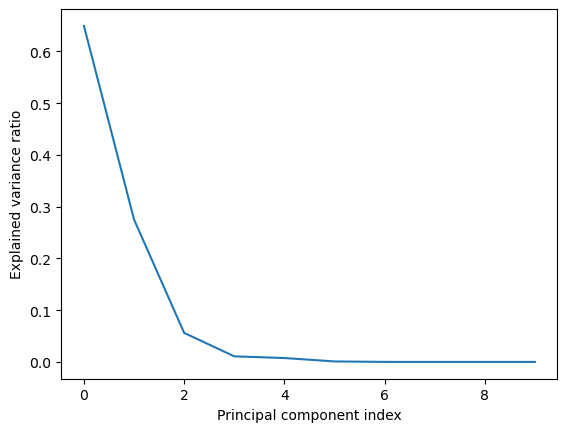

CPU times: total: 484 ms
Wall time: 121 ms


In [128]:
%%time

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)

# Fit PCA
pca.fit(location_table)

# Plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

2 components explain most of the variance. Let's find the special locations:

In [129]:
%%time

# Recalculate PCA 
pca = PCA(n_components = 2)
pca.fit(location_table)

# Create importance dataframes
location_importances = pd.DataFrame(np.transpose(abs(pca.components_)), index = location_table.columns, columns=['PC1', "PC2"])


print('Locations sorted by PC1 imortance:')
location_importances.sort_values(by='PC1', ascending=False).head(10)

Locations sorted by PC1 imortance:
CPU times: total: 31.2 ms
Wall time: 14.6 ms


,PC1,PC2
Location,,
-2.07929.321,0.991361,0.088617
-2.37829.222,0.050352,0.164703
-1.34631.254,0.024180,0.048800
-1.51429.686,0.020555,0.189729
-1.31930.281,0.019428,0.149098
-2.33529.665,0.019208,0.137005
-2.15429.946,0.018832,0.142713
-0.95630.744,0.017227,0.044920
-1.88230.018,0.017226,0.120596


In [130]:
print('Locations sorted by PC2 imortance:')
location_importances.sort_values(by='PC2', ascending=False).head(10)

Locations sorted by PC2 imortance:


,PC1,PC2
Location,,
-1.51429.686,0.020555,0.189729
-2.59929.801,0.009692,0.184982
-2.37829.222,0.050352,0.164703
-1.48629.614,0.011875,0.160348
-2.29329.507,0.013203,0.160082
-2.37629.924,0.005365,0.150127
-1.31930.281,0.019428,0.149098
-2.15429.946,0.018832,0.142713
-2.33529.665,0.019208,0.137005


In [184]:
special_locations = location_importances.sort_values(by='PC1', ascending=False).index[:2].tolist()
    
special_locations

['-2.07929.321', '-2.37829.222']

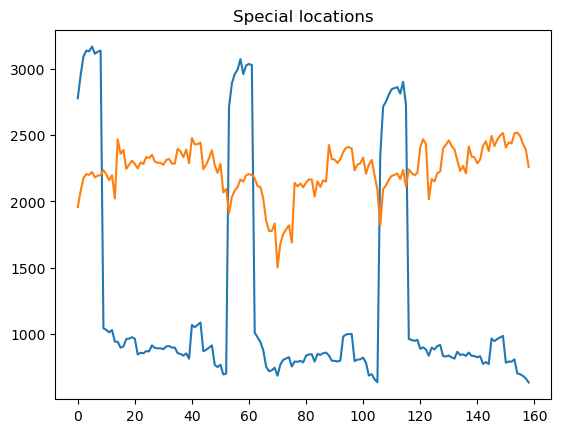

CPU times: total: 125 ms
Wall time: 126 ms


In [185]:
%%time


for location in special_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)
plt.title('Special locations')
plt.show()

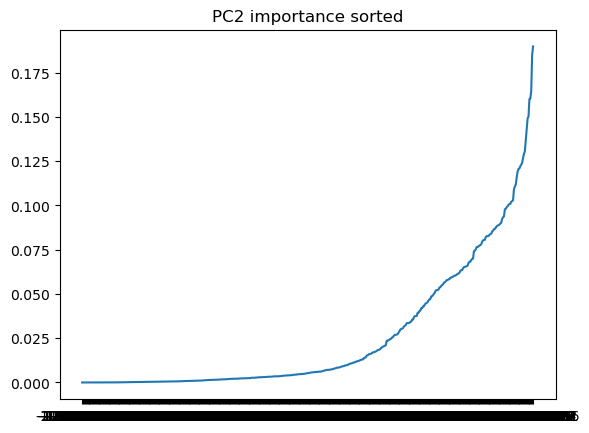

In [186]:
plt.plot(location_importances['PC2'].sort_values(ascending=True))
plt.title('PC2 importance sorted')
plt.show()

Playing with border_importane parameter we can separate the rest of locations in two distinct groups with common patterns:

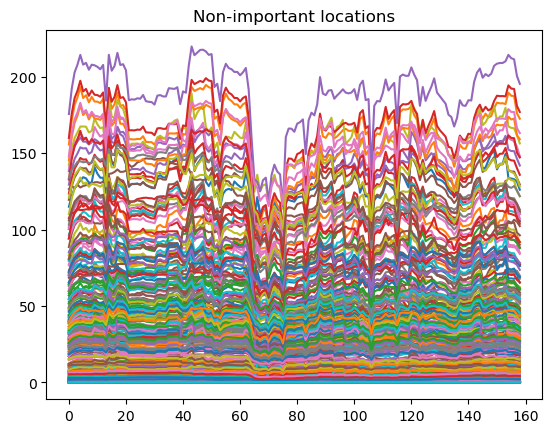

CPU times: total: 516 ms
Wall time: 532 ms


In [187]:
%%time



border_importance = location_importances['PC2'].quantile(0.65)

non_important_locations = location_importances.loc[location_importances['PC2'] < border_importance].index.to_list()
important_locations = location_importances.loc[location_importances['PC2'] >= border_importance].index.to_list()
important_locations = list(set(important_locations) - set(special_locations))
assert(len(non_important_locations) + len(important_locations) + len(special_locations) == len(location_table.columns))

for location in non_important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)  

plt.title('Non-important locations')
plt.show()

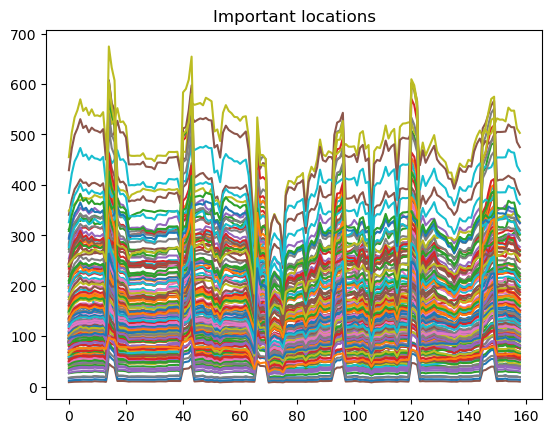

CPU times: total: 250 ms
Wall time: 285 ms


In [188]:
%%time

for location in important_locations:
    series = location_table[location]
    plt.plot(range(len(series)), series)    
plt.title('Important locations')
plt.show()

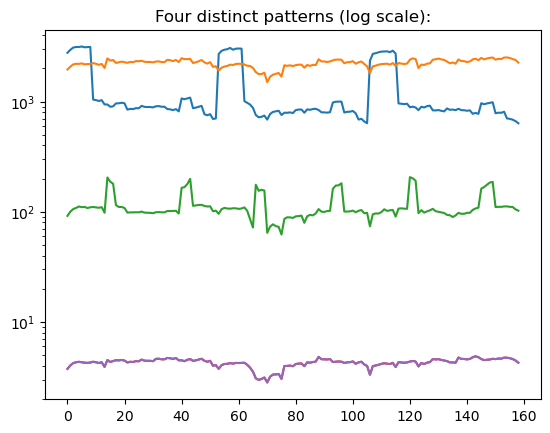

In [189]:
four_representatives = special_locations.copy()
four_representatives.append(important_locations[0])
four_representatives.append(non_important_locations[0])

fig, ax = plt.subplots()
for location in four_representatives:
    series = location_table[location]
    plt.plot(range(len(series)), series)   
plt.title('Four distinct patterns (log scale):')
ax.set_yscale('log')
plt.show()

One of the special locations has a pattern similar to the patterns for the low emissions locations, but, since it has high emission, I will still explore it separately.

In [192]:
%%time

feature_name = 'Location_group'

location_importances[feature_name] = ['High' if location in important_locations else \
                           'Low' if location in non_important_locations else \
                          "Special 1" if location == special_locations[0] else \
                          "Special 2" if location == special_locations[1] else \
                          "ERROR" for location in location_importances.index]

for data in [train, test]:
    
    data[feature_name] = data["Location"].map(location_importances[feature_name])
    
    print(data[feature_name].info())
    print(data[feature_name].describe())
    print('Unique Values and their count:')
    print(data[feature_name].value_counts())


<class 'pandas.core.series.Series'>
Index: 79023 entries, ID_-0.510_29.290_2019_00 to ID_-3.299_30.301_2021_52
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
79023 non-null  object
dtypes: object(1)
memory usage: 3.2+ MB
None
count     79023
unique        4
top         Low
freq      51357
Name: Location_group, dtype: object
Unique Values and their count:
Low          51357
High         27348
Special 1      159
Special 2      159
Name: Location_group, dtype: int64
<class 'pandas.core.series.Series'>
Index: 24353 entries, ID_-0.510_29.290_2022_00 to ID_-3.299_30.301_2022_48
Series name: Location_group
Non-Null Count  Dtype 
--------------  ----- 
24353 non-null  object
dtypes: object(1)
memory usage: 380.5+ KB
None
count     24353
unique        4
top         Low
freq      15827
Name: Location_group, dtype: object
Unique Values and their count:
Low          15827
High          8428
Special 1       49
Special 2       49
Name: Location_group, dtype: int64
CPU time

## Discover COVID patterns

As AmbrosM described, the emissions were affected by one-time event: the COVID pandemic.

I will try to discover the patterns and 'deCOVIDify' the datasets.

My approach will start with finding the features that correlate the most with the target. We'll do so seprately for four Location Groups:

In [210]:
%%time

location_groups = location_importances['Location_group'].unique()

for group in location_groups: 
    print('Location group: {}'.format(group))
    print()
    print(train.loc[train['Location_group'] == group, :].corrwith(\
            train.loc[train['Location_group'] == group, 'emission'], numeric_only=True).sort_values(ascending=False).head(15))

Location group: Low

emission                                                    1.000000
longitude                                                   0.306238
UvAerosolLayerHeight_aerosol_optical_depth                  0.188822
UvAerosolLayerHeight_solar_zenith_angle                     0.129041
Cloud_surface_albedo                                        0.108811
Formaldehyde_tropospheric_HCHO_column_number_density_amf    0.085161
latitude                                                    0.076821
NitrogenDioxide_absorbing_aerosol_index                     0.058122
SulphurDioxide_SO2_column_number_density_amf                0.049788
NitrogenDioxide_cloud_fraction                              0.041638
SulphurDioxide_cloud_fraction                               0.022850
week_no                                                     0.018811
UvAerosolIndex_absorbing_aerosol_index                      0.018570
UvAerosolIndex_sensor_azimuth_angle                         0.017209
Cloud_cloud_o

C:\Users\mikej\anaconda3\lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\mikej\anaconda3\lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


The goal is to find features that we can use in calculating COVID patters. Lets start with Low Group.

UvAerosolLayerHeight_ features can't be used, because of lack of observations. Let's explore two other candidates:

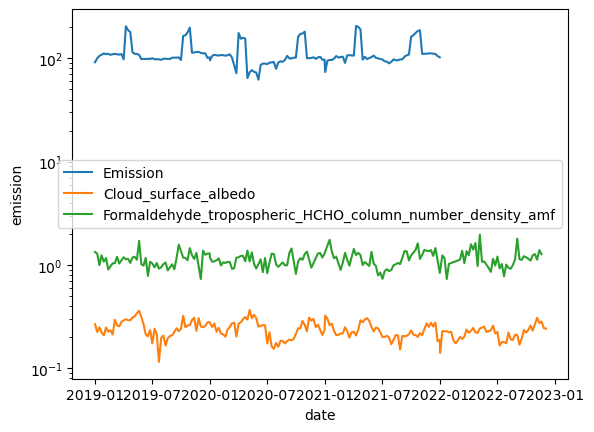

CPU times: total: 438 ms
Wall time: 478 ms


In [220]:
%%time

train_and_test = pd.concat([train, test])

location = four_representatives[2]

import seaborn as sns

fig, ax = plt.subplots()
sns.lineplot(data = train[train['Location'] == location], x='date', y='emission', label='Emission')
sns.lineplot(data = train_and_test[train_and_test['Location'] == location], x='date', y='Cloud_surface_albedo', label='Cloud_surface_albedo')
sns.lineplot(data = train_and_test[train_and_test['Location'] == location], x='date',
             y='Formaldehyde_tropospheric_HCHO_column_number_density_amf',
             label='Formaldehyde_tropospheric_HCHO_column_number_density_amf')
ax.set_yscale('log')
plt.legend()
plt.show()